# Lesson 7 - Session 2 - example 3

Predict house prices

packages used: pandas, scikit-learn, openpyxl


In [45]:
# read data from excel file and rename columns
import pandas as pd

df = pd.read_excel("../data/Real estate valuation data set.xlsx")
df.rename(
    columns={
        "X1 transaction date": "transaction_date",
        "X5 latitude": "lat",
        "X6 longitude": "lon",
        "X2 house age": "age",
        "X3 distance to the nearest MRT station": "distance_MRT",
        "X4 number of convenience stores": "stores",
        "Y house price of unit area": "price",
    },
    inplace=True,
)
df

,transaction_date,age,distance_MRT,stores,lat,lon,price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


## Linear regression 

1. Specify features and target variable
2. Split train/test
3. Apply sklearn.linear_model.LinearRegression
4. Draw predicted values vs test values
5. Compute 4 evaluation metrics ($R^2$, MSE, RMSE, MAE)

In [49]:
# 1. Specify features and target variable

X = df.iloc[:, 0:-1]
y = df["price"]
print(X.shape, y.shape)

(414, 6) (414,)


In [51]:
# 2. Split train/test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(289, 6) (289,) (125, 6) (125,)


In [53]:
# 3. Apply linear regression, compute scores over train data and test data

from sklearn.linear_model import LinearRegression

# linear regression over training data
rgr = LinearRegression()
rgr.fit(X_train, y_train)
print(rgr.coef_, rgr.intercept_)
print("Score (train) = ", rgr.score(X_train, y_train))
print("Score (test) = ", rgr.score(X_test, y_test))

[ 5.85014746e+00 -2.42551464e-01 -5.13870668e-03  1.07453372e+00
  2.39100477e+02 -5.22365968e+01] -11355.385619716399
Score (train) =  0.5862205607346797
Score (test) =  0.5600810475775264


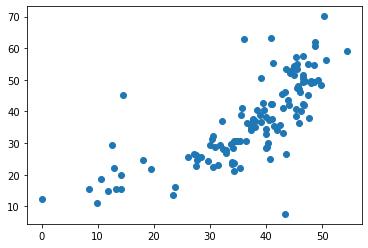

In [55]:
# 4. Draw predicted values vs test values

import matplotlib.pyplot as plt

# compute predicted values for test data
y_pred = rgr.predict(X_test)

# check graphically how well the predictions match actual values
plt.scatter(y_pred, y_test);

In [57]:
# 5. Compute 4 evaluation metrics (R^2, MSE, RMSE, MAE)

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"{r2=}, {mae=}")
print(f"{mse=}, {rmse=}")

r2=0.5600810475775264, mae=6.184744566032061
mse=73.56549791983365, rmse=8.577033165368643


## Usage of sklearn.dummy.DummyRegressor as a baseline

Score (train) =  0.0
r2=-0.013981455468037751, mae=10.73676401384083
mse=169.56316667472848, rmse=13.021642241849854


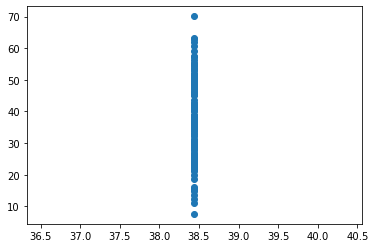

In [63]:
from sklearn.dummy import DummyRegressor

# dummy regression over training data
rgr = DummyRegressor(strategy="mean")
rgr.fit(X_train, y_train)
print("Score (train) = ", rgr.score(X_train, y_train))

# compute predicted values for test data 
y_pred = rgr.predict(X_test)

# check graphically how well the predictions match actual values
plt.scatter(y_pred, y_test)

# compute metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"{r2=}, {mae=}")
print(f"{mse=}, {rmse=}")

## Evaluate sklearn.linear_model.LinearRegression using cross validate

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate

# cross validation with k=5 folds using linear regression
cv_results = cross_validate(
    LinearRegression(),
    X,
    y,
    cv=5,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
)
df = pd.DataFrame(cv_results)
df

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.052999,0.003001,0.711797,-5.453073,-49.892841,-7.063486
1,0.003000,0.003001,0.519385,-6.916183,-89.032691,-9.435714
2,0.002998,0.002001,0.661823,-5.257454,-57.869860,-7.607224
3,0.004998,0.003000,0.439505,-7.348360,-134.817953,-11.611113
4,0.004002,0.002001,0.593270,-5.889224,-60.048366,-7.749088


In [108]:
print("Mean R-squared", df['test_r2'].mean())
print("Mean MAE", -df['test_neg_mean_absolute_error'].mean())
print("Mean MSE", -df['test_neg_mean_squared_error'].mean())
print("Mean RMSE", np.sqrt(-df['test_neg_mean_squared_error'].mean()))

Mean R-squared 0.5851559288125723
Mean MAE 6.172859085203855
Mean MSE 78.33234207633008
Mean RMSE 8.85055603204285


## Elastic Net (hyperparameter tuning)

In [104]:
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.model_selection import GridSearchCV

mod = GridSearchCV(estimator=ElasticNet(),
                   param_grid={
                     'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                     'l1_ratio': np.linspace(0.1,1,5),
                     'max_iter':[10000]
                   }, cv=5)

mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002800,7.499348e-04,0.001400,0.000490,0.1,0.1,10000,"{'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 10...",0.666309,0.507689,0.626724,0.399908,0.587619,0.557650,0.094715,5
1,0.001601,8.011342e-04,0.001200,0.000401,0.1,0.325,10000,"{'alpha': 0.1, 'l1_ratio': 0.325, 'max_iter': ...",0.667551,0.506892,0.626705,0.400742,0.588331,0.558044,0.094851,4
2,0.003001,6.332402e-04,0.004999,0.006001,0.1,0.55,10000,"{'alpha': 0.1, 'l1_ratio': 0.55, 'max_iter': 1...",0.669260,0.505688,0.626617,0.401880,0.589220,0.558533,0.095048,3
3,0.003000,1.549237e-03,0.002000,0.000632,0.1,0.775,10000,"{'alpha': 0.1, 'l1_ratio': 0.775, 'max_iter': ...",0.671644,0.503619,0.626260,0.403446,0.590253,0.559045,0.095345,2
4,0.002800,4.008070e-04,0.002201,0.000400,0.1,1.0,10000,"{'alpha': 0.1, 'l1_ratio': 1.0, 'max_iter': 10...",0.675179,0.499566,0.625179,0.405727,0.591268,0.559384,0.095857,1
5,0.002799,7.490684e-04,0.001800,0.000748,0.3,0.1,10000,"{'alpha': 0.3, 'l1_ratio': 0.1, 'max_iter': 10...",0.656540,0.510346,0.623985,0.393902,0.582869,0.553529,0.093575,10
6,0.002200,7.481121e-04,0.001800,0.000749,0.3,0.325,10000,"{'alpha': 0.3, 'l1_ratio': 0.325, 'max_iter': ...",0.656440,0.510236,0.624154,0.393951,0.583148,0.553586,0.093590,9
7,0.001799,3.998291e-04,0.001400,0.000799,0.3,0.55,10000,"{'alpha': 0.3, 'l1_ratio': 0.55, 'max_iter': 1...",0.656291,0.510051,0.624387,0.394027,0.583580,0.553667,0.093611,8
8,0.002000,9.488940e-07,0.001600,0.000490,0.3,0.775,10000,"{'alpha': 0.3, 'l1_ratio': 0.775, 'max_iter': ...",0.656020,0.509632,0.624743,0.394168,0.584367,0.553786,0.093648,7
9,0.002000,8.944696e-04,0.001200,0.000400,0.3,1.0,10000,"{'alpha': 0.3, 'l1_ratio': 1.0, 'max_iter': 10...",0.655297,0.507917,0.625298,0.394538,0.586316,0.553873,0.093745,6
